# Feature Engineer Testing

In [59]:
#statistical
import pandas as pd
import numpy as np

#dataset
from sklearn.datasets import *

#mchine learning
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score, r2_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler

#graphing and display
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

#feature engineer
import feature_engineer as fe

#other
from pprint import pprint

In [60]:
def create_dataset(bunch):
    df = pd.DataFrame(bunch.data, columns = bunch.feature_names)
    df['target'] = bunch.target
    return df

def enrich_data(eng, X_train, X_test, y_train):
    eng.fit(X_train, y_train)
    X_train = eng.transform(X_train)
    X_test = eng.transform(X_test)
    return X_train, X_test

In [61]:
iris = load_iris()
boston_housing = load_boston()
diabetes = load_diabetes()
linnerud = load_linnerud()
wine = load_wine()
breast_cancer = load_breast_cancer()

# Create Dataset Map

In [62]:
datasets = {}
for name, bunch in zip(['iris', 'wine', 'breast_cancer'],
                       [iris, wine, breast_cancer]):
    datasets[name] = create_dataset(bunch)

### Show a Single Dataset

In [63]:
datasets['iris'].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Define The Test Metrics

In [64]:
metrics = {'accuracy' : {'metric' : accuracy_score, 'kwargs' : {'normalize' : True}},
           'precision' : {'metric' : precision_score, 'kwargs' : {'average' : 'weighted'}},
           'recall' : {'metric' : recall_score, 'kwargs' : {'average' : 'weighted'}},
           'f1_score' : {'metric' : f1_score, 'kwargs' : {'average' : 'weighted'}}}

# Define The Models

In [65]:
models = {'logistic' : LogisticRegression(),
          'bayes' : GaussianNB()}

# Define The Hyperparameters

In [66]:
hyperparameters = {'random_seed' : 42,
                   'test_size' : 0.3,
                   'n_best' : 5}

# Define The Splitter

In [67]:
splitter = {'splitter' : train_test_split,
            'kwargs' : {'test_size' : hyperparameters['test_size'],
                        'random_state' : hyperparameters['random_seed']}}

# Demonstrate Data Enrichment

In [68]:
#define the feature engineer object
eng = fe.FeatureEngineer(model = models['logistic'],
                         scorer = metrics['f1_score']['metric'],
                         splitter = splitter['splitter'],
                         n_best = hyperparameters['n_best'],
                         scorer_kwargs = metrics['f1_score']['kwargs'],
                         splitter_kwargs = splitter['kwargs'])

#fit to a dataframe
sample = datasets['iris'].drop('target', axis = 1)
eng.fit(sample, datasets['iris'].target)
sample = eng.transform(sample)

C:\Users\rossr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Before

In [69]:
datasets['iris'].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## After

In [70]:
sample.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),petal length (cm)_sub_sepal length (cm),sepal length (cm)_truediv_petal length (cm),petal width (cm)_sub_sepal width (cm),petal length (cm)_sub_sepal width (cm),petal width (cm)_mul_petal length (cm)
0,5.1,3.5,1.4,0.2,-3.7,3.642857,-3.3,-2.1,0.28
1,4.9,3.0,1.4,0.2,-3.5,3.500000,-2.8,-1.6,0.28
2,4.7,3.2,1.3,0.2,-3.4,3.615385,-3.0,-1.9,0.26
3,4.6,3.1,1.5,0.2,-3.1,3.066667,-2.9,-1.6,0.30
4,5.0,3.6,1.4,0.2,-3.6,3.571429,-3.4,-2.2,0.28


# Produce Metrics Before and After Enrichment

In [71]:
results = pd.DataFrame(columns = ['dataset', 'enriched', 'metric', 'model', 'score'])
model_columns = pd.DataFrame(columns = ['dataset', 'enriched', 'metric', 'model', 'column', 'score'])
engine_columns = pd.DataFrame(columns = ['dataset', 'enriched', 'metric', 'model', 'column', 'score'])

In [72]:
for enriched in [True, False]:
    for dataset_name, dataset in datasets.items():
        for metric_name, metric in metrics.items():
            for model_name, model in models.items():
                
                #create engine
                eng = fe.FeatureEngineer(model = model,
                         scorer = metric['metric'],
                         splitter = splitter['splitter'],
                         n_best = hyperparameters['n_best'],
                         scorer_kwargs = metric['kwargs'],
                         splitter_kwargs = splitter['kwargs'])
                
                #split the dataset
                X_train, X_test, y_train, y_test = splitter['splitter'](dataset.drop('target', axis = 1),
                                                                        dataset.target,
                                                                        **splitter['kwargs'])
                
                #enrich data
                if enriched:
                    X_train, X_test = enrich_data(eng, X_train, X_test, y_train)
                
                #scale data
                scaler = MinMaxScaler()
                for df in X_train, X_test:
                    df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
                
                #fit model
                model.fit(X_train, y_train)
                
                #obtain prediction
                y_pred = model.predict(X_test)
                
                #obtain score
                score = metric['metric'](y_test, y_pred, **metric['kwargs'])
                
                #append results
                to_append = pd.DataFrame([[dataset_name, enriched, metric_name,
                                               model_name, score]],
                                             columns = results.columns)
                
                results = results.append(to_append, ignore_index = True)
                
                if model_name == 'logistic':
                    for coef, feature in zip(model.coef_[0, :], X_train.columns):
                        to_append = pd.DataFrame([[dataset_name, enriched,
                                                   metric_name, model_name,
                                                   feature, coef]],
                                                 columns = model_columns.columns)
                        
                        model_columns = model_columns.append(to_append, ignore_index = True)
                
                

C:\Users\rossr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\rossr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Results Before and After Enrichment

In [73]:
results.sort_values(by = ['dataset', 'metric', 'model', 'enriched'])

,dataset,enriched,metric,model,score
41,breast_cancer,False,accuracy,bayes,0.941520
17,breast_cancer,True,accuracy,bayes,0.947368
40,breast_cancer,False,accuracy,logistic,0.964912
16,breast_cancer,True,accuracy,logistic,0.988304
47,breast_cancer,False,f1_score,bayes,0.941317
23,breast_cancer,True,f1_score,bayes,0.953216
46,breast_cancer,False,f1_score,logistic,0.964790
22,breast_cancer,True,f1_score,logistic,0.982484
43,breast_cancer,False,precision,bayes,0.941391
19,breast_cancer,True,precision,bayes,0.953216


# Improvement After Enrichment Accross The Evaluation Metrics

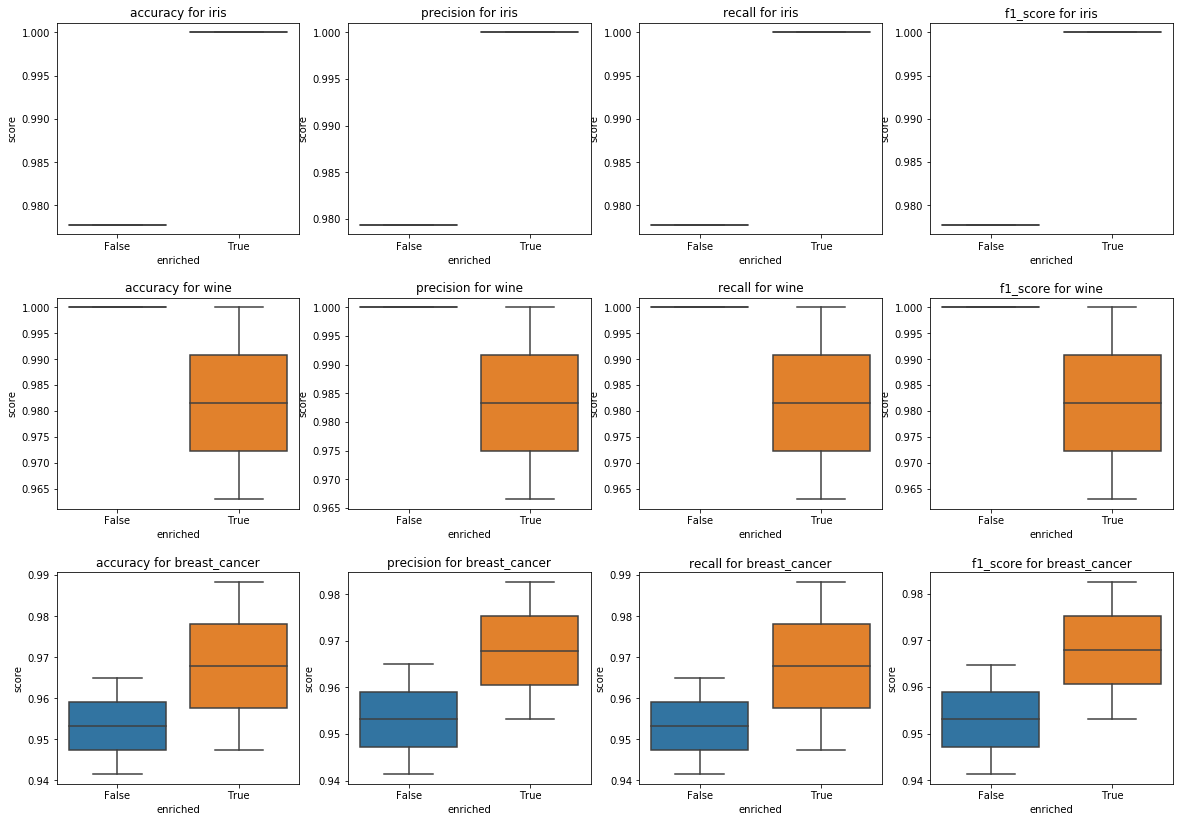

In [74]:
fig = plt.figure(figsize = (20, 14))
len_x = len(results.dataset.unique())
len_y = len(results.metric.unique())
i = 0
for dataset in results.dataset.unique():
    for metric in results.metric.unique():
        i += 1
        ax = plt.subplot(len_x, len_y, i)
        to_plot = results[(results.dataset == dataset) & (results.metric == metric)]
        ax.set_title('%s for %s' % (metric, dataset))
        sns.boxplot(x = 'enriched', y = 'score', data = to_plot)
plt.subplots_adjust(hspace = 0.3)

# Logistic Regression Best Features

In [82]:
n = 5
for dataset in model_columns.dataset.unique():
    print('Top %s columns for %s' % (n, dataset))
    display(model_columns[(model_columns.enriched == True) &
                          (model_columns.metric == 'f1_score') &
                          (model_columns.dataset == dataset)]\
            [['column', 'score']]\
            .sort_values(by = ['score'],
                         ascending = False)[:n])

Top 5 columns for iris


,column,score
35,sepal width (cm)_truediv_petal width (cm),0.465449
32,sepal length (cm)_truediv_petal width (cm),0.312646
28,sepal width (cm),-0.018454
31,petal length (cm)_sub_sepal length (cm),-0.124304
34,petal width (cm)_sub_sepal width (cm),-0.134698


Top 5 columns for wine


,column,score
105,flavanoids_mul_ash,0.949504
91,malic_acid,0.642028
92,ash,0.397309
99,color_intensity,0.354016
104,flavanoids_add_ash,0.222122


Top 5 columns for breast_cancer


,column,score
224,texture error,1.048449
215,mean perimeter,0.506012
225,perimeter error,0.235199
245,worst concave points_mul_mean perimeter,0.183972
229,concavity error,0.070673
